# Introduction to Regression with Neural Networks in TensorFlow.

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some combination of variables, even shorter... predicting a number.

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit

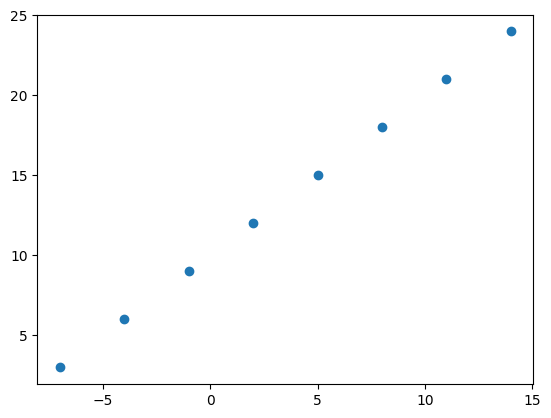

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it 
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and ouput shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

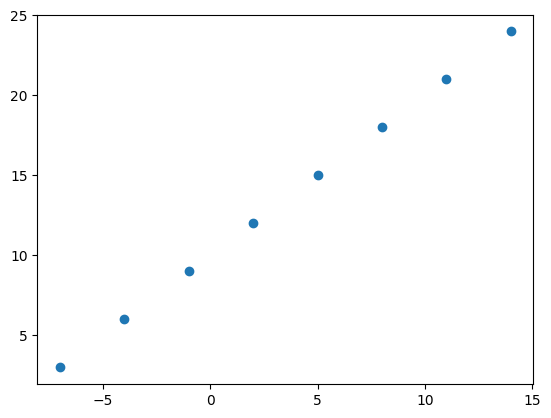

In [ ]:
plt.scatter(X, y)

## Saving and reloading a trained model

In [ ]:
import os, datetime, pytz
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  tz = pytz.timezone('Europe/Paris')
  modeldir = os.path.join("drive/MyDrive/Neural_network_regression_with_tensorflow_video/models",
                          datetime.datetime.now().astimezone(tz).strftime("%d%m%Y-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
import tensorflow_hub as hub
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer":hub.KerasLayer}) # first layer
  return model

## Valid set

In [ ]:
X_valid = np.array([14 , -9, 10, 16, 6, 12, -8])
y_valid = np.array([24, 1, 20, 26, 16, 22, 2])
X_valid = tf.constant(X_valid)
y_valid = tf.constant(y_valid)
val_data_ = (X_valid, y_valid)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output, as well as the hidden layers of a deep learning model.

2. **Compliling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.sequential()
# model.add(tf.keras.layers.Dense(8 input_shape=(16,)))
# ...

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
NUM_EPOCHS = 200 #@param {type:"slider",min:10, max:1000, step:10}

In [ ]:
# Create early stopping callback
def create_early_stopping(monitor_, patience_):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor_,
                                                    patience=patience_)
  return early_stopping

In [ ]:
def train_model(monitor, patience):
  # Set random seed
  tf.random.set_seed(42)
  early_stopping = create_early_stopping(monitor, patience)

  # 1. Create a model using the Sequential API
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"), 
    tf.keras.layers.Dense(100, activation="relu"),   
    tf.keras.layers.Dense(1) 
    ]) 
  # 100 is the number of neurones


  #2. Compile the model
  model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochastic gradient descent, the higher learning rate is the higher it improves
                metrics=["mae"])

  #3. Fit the model
  model.fit(tf.expand_dims(X, axis=1),
            y, 
            epochs=NUM_EPOCHS,
            validation_data=val_data_) # Evaluating function
  return model

In [ ]:
model = train_model("val_mae", 3)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 13.0030 - mae: 13.0030 - val_loss: 10.2335 - val_mae: 10.2335
Epoch 2/200
1/1 [==============================] - 0s 47ms/step - loss: 9.7038 - mae: 9.7038 - val_loss: 4.8918 - val_mae: 4.8918
Epoch 3/200
1/1 [==============================] - 0s 65ms/step - loss: 5.6724 - mae: 5.6724 - val_loss: 8.4186 - val_mae: 8.4186
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 5.5907 - mae: 5.5907 - val_loss: 11.7640 - val_mae: 11.7640
Epoch 5/200
1/1 [==============================] - 0s 67ms/step - loss: 6.8221 - mae: 6.8221 - val_loss: 8.8535 - val_mae: 8.8535
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 5.5785 - mae: 5.5785 - val_loss: 5.1781 - val_mae: 5.1781
Epoch 7/200
1/1 [==============================] - 0s 66ms/step - loss: 4.0893 - mae: 4.0893 - val_loss: 3.6008 - val_mae: 3.6008
Epoch 8/200
1/1 [==============================] - 0s 53ms/step - loss: 4.3087 - mae: 

In [ ]:
# Let's check out X and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([5.0])
y_pred

1/1 [==============================] - 0s 124ms/step


array([[15.404404]], dtype=float32)

In [ ]:
model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 33ms/step - loss: 0.9659 - mae: 0.9659


[0.9659422636032104, 0.9659422636032104]

## Improving our models

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurones) within of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

## Evaluating a model

In practice, a typical workflow you'll go trough when building neurals networks is: 

```
Build a model -> fit it -> evaluatie it -> tweak a model -> fit it -> evaluate it -> tweak a model ->  fit it -> evaluate it -> ...
```

When it comes to evaluation ... there are 3 words you should memorize: 

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset 
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

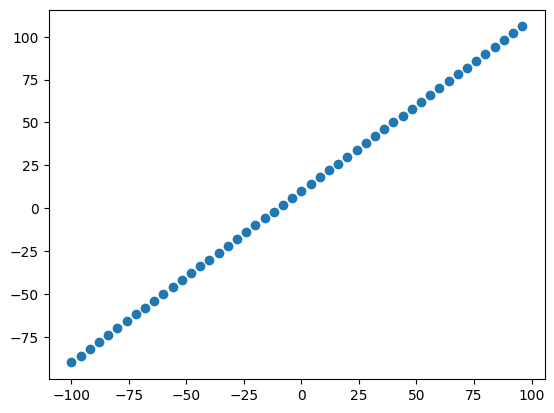

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).


In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2)
len(X_train), len(y_train), len(X_val), len(y_val)
# Only works with array not tensors

(40, 40, 10, 10)

In [ ]:
X_train = tf.constant(X_train)
X_val = tf.constant(X_val)
y_train = tf.constant(y_train)
y_val = tf.constant(y_val)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(40, 40, 10, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

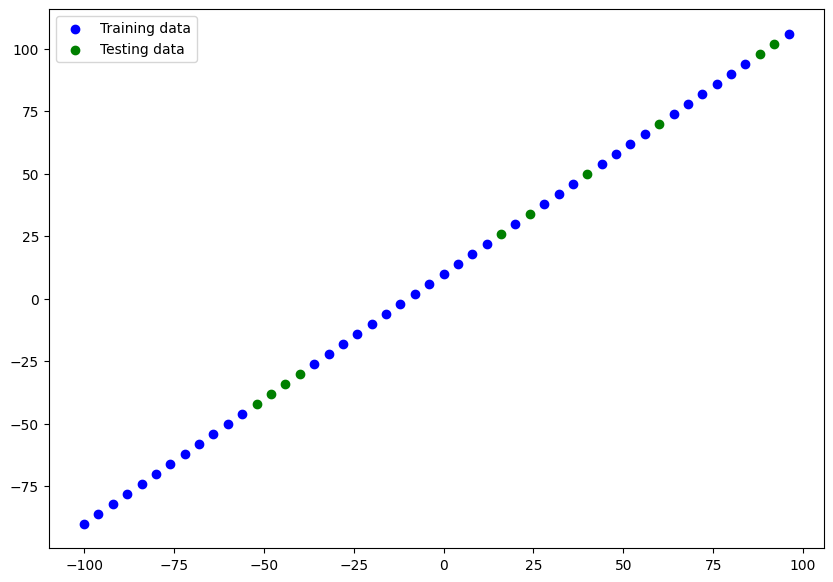

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train,
            y_train,
            c="b",
            label="Training data")
# Plot test data in green
plt.scatter(X_val,
            y_val,
            c="g",
            label='Testing data')
plt.legend();

In [ ]:
# Let's have a look at how to build a neurol network for our data

# 1. Create a model

model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

# # 3. Fit the model
# model.fit(X_train,
#           y_train,
#           epochs=100)

### Visualizing the model

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
          tf.keras.layers.Dense(10, input_shape=[2], name="input_layer"),
          tf.keras.layers.Dense(5, name="output_layer"),
          tf.keras.layers.Dense(8, name="third_layer"),
          tf.keras.layers.Dense(2, name="fourth")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary() # le nombre de biais dans une couche dense est égal au nombre de neurones dans cette couche. Un neurone pour chaque paramètre de sortie.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                30        
                                                                 
 output_layer (Dense)        (None, 5)                 55        
                                                                 
 third_layer (Dense)         (None, 8)                 48        
                                                                 
 fourth (Dense)              (None, 2)                 18        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non trainable params - These parameters are updated during training (This is when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth of the trainable parameters within a layer, check out http://introtodeeplearning.com/.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                30        
                                                                 
 output_layer (Dense)        (None, 5)                 55        
                                                                 
 third_layer (Dense)         (None, 8)                 48        
                                                                 
 fourth (Dense)              (None, 2)                 18        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


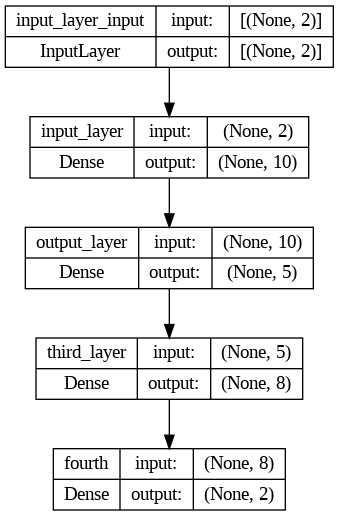

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

 On calcule en mulitpliant l'input par l'output et en rajoutant le biais un pour chaque output

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1,input_shape=[1])
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Let's fit our model to the training data 
# 3. Fit the model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0)

### Visualizing our model's predictions

To visualize our predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground thruth versus your model's predictions).


In [ ]:
# Make some predictions
y_pred = model.predict(X_valid)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[14.120373 ],
       [-6.767113 ],
       [10.487766 ],
       [15.936676 ],
       [ 6.8551598],
       [12.3040695],
       [-5.858962 ]], dtype=float32)

In [ ]:
y_valid

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([24,  1, 20, 26, 16, 22,  2])>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_valid,
              test_labels=y_valid,
              predictions=y_pred):
  """
  Plots training data, test data and compares preditions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data,
              train_labels,
              c="b",
              label="Training data")
  # Plot test data in green
  plt.scatter(test_data,
              test_labels,
              c="g",
              label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data,
              predictions,
              c="r",
              label="Predictions"
              )
  plt.legend();

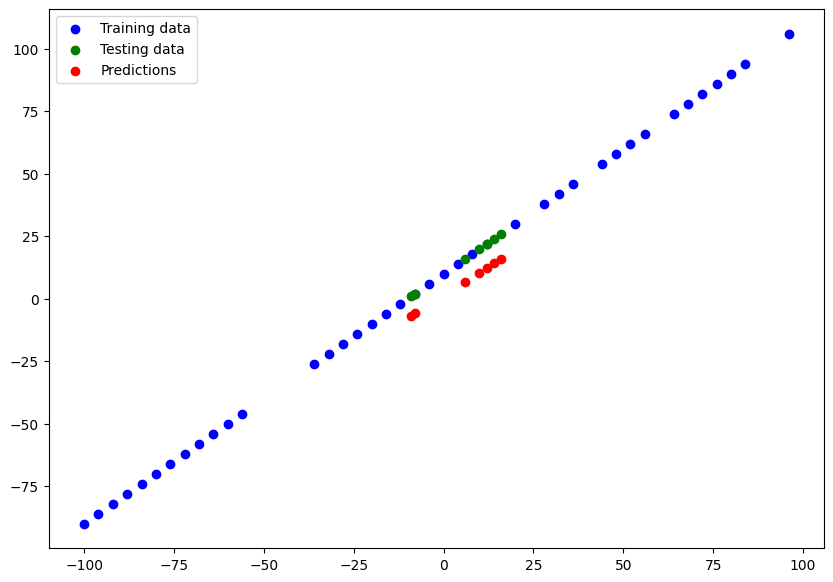

In [ ]:
plot_pred(X_train, y_train, X_valid, y_valid, y_pred)

### Evaluating our model's predictions with evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression two of the main metrics:
* MAE - mean absolute error, "on average", how wrong is each of my model's predictions.
* MSI - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 191ms/step - loss: 9.1317 - mae: 9.1317


[9.131718635559082, 9.131718635559082]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_valid,
                                     tf.constant(y_pred))
mae

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([ 8.948412, 22.624254, 10.505242,  8.169996, 12.062075,  9.726828,
       21.716106], dtype=float32)>

In [ ]:
y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([14.120373 , -6.767113 , 10.487766 , 15.936676 ,  6.8551598,
       12.3040695, -5.858962 ], dtype=float32)>

In [ ]:
y_valid

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([24,  1, 20, 26, 16, 22,  2])>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_valid,
                                     y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.131719>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_valid,
                                    y_pred)
mse # For larger errors

<tf.Tensor: shape=(), dtype=float32, numpy=84.15581>

In [ ]:
# Make some functions to reuse MAE and MSE 
def mae(y_true, y_pred):
   return tf.metrics.mean_absolute_error(y_true,
                                         y_pred).numpy()
def mse(y_true, y_pred):
   return tf.metrics.mean_squared_error(y_true,
                                        y_pred).numpy()
    

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do three modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int64, numpy=
 array([ -24,  -88,  -68,  -32,   20,  -72,   84,   56,    4,  -92,    8,
         -84,  -12, -100,   68,   28,   52,   76,   -8,  -20,   44,  -96,
         -16,   72,  -28,   80,   -4,   12,   32,   36,    0,   48,  -64,
         -80,  -36,   96,   64,  -56,  -60,  -76])>,
 <tf.Tensor: shape=(40,), dtype=int64, numpy=
 array([-14, -78, -58, -22,  30, -62,  94,  66,  14, -82,  18, -74,  -2,
        -90,  78,  38,  62,  86,   2, -10,  54, -86,  -6,  82, -18,  90,
          6,  22,  42,  46,  10,  58, -54, -70, -26, 106,  74, -46, -50,
        -66])>)

**Build** `model_1`

In [ ]:
# Set random_seed
tf.random.set_seed(42)

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1,input_shape=[1])
], name="model_1")
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])
# Let's fit our model to the training data 
# 3. Fit the model
model_1.fit(X_train,
          y_train,
          epochs=100,
          verbose=0)

In [ ]:
y_pred_1 = tf.squeeze(tf.constant(model_1.predict(X_valid)))

1/1 [==============================] - 0s 97ms/step


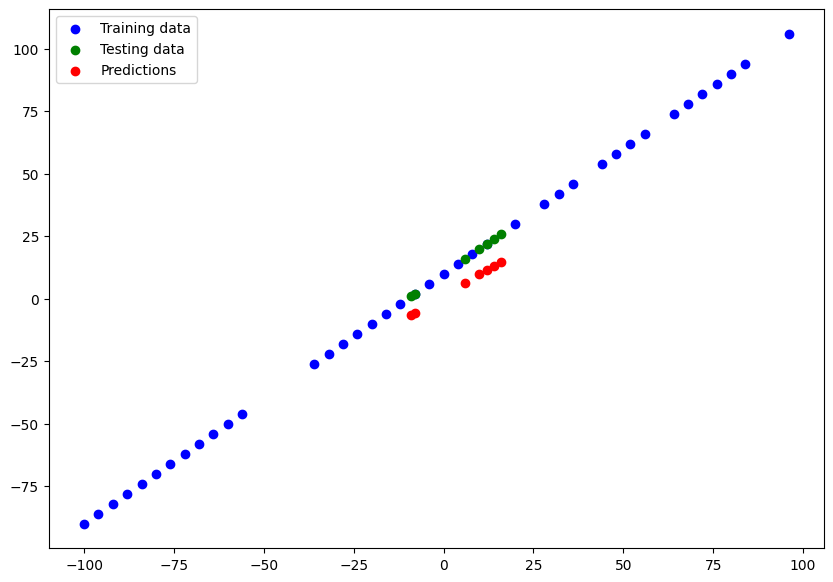

In [ ]:
plot_pred(X_train,
          y_train,
          X_valid,
          y_valid,
          y_pred_1)

In [ ]:
mae_1 = mae(y_valid, y_pred_1),
mse_1 = mse(y_valid, y_pred_1)

**Build** `model_2`

In [ ]:
# Set random_seed
tf.random.set_seed(42)

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10,input_shape=[1]),
          tf.keras.layers.Dense(1)
], name="model_2")
# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# Let's fit our model to the training data 
# 3. Fit the model
model_2.fit(X_train,
          y_train,
          epochs=100
          )

Epoch 1/100
2/2 [==============================] - 1s 47ms/step - loss: 9.9145 - mse: 110.6656
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 28.2075 - mse: 2101.4116
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 31.4708 - mse: 1415.2955
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0823 - mse: 128.8309
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 29.8773 - mse: 1255.8669
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 10.2545 - mse: 121.1789
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 10.9646 - mse: 181.3670
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 15.8509 - mse: 387.1945
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 25.3304 - mse: 933.6271
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 26.8967 - mse: 1080.5685
Epoch 11/100
2/2 [==================

In [ ]:
y_pred_2 = tf.squeeze(tf.constant(model_2.predict(X_valid)))

1/1 [==============================] - 0s 248ms/step


In [ ]:
len(y_valid)

7

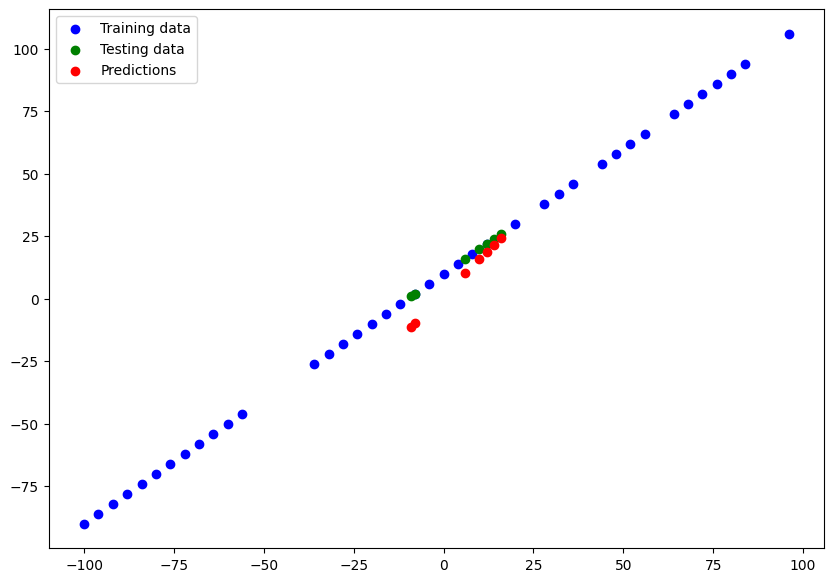

In [ ]:
plot_pred(X_train,
          y_train,
          X_valid,
          y_valid,
          y_pred_2)

In [ ]:
mae_2 = mae(y_valid, y_pred), 
mse_2 = mse(y_valid, y_pred)

**Build** `model_3`

In [ ]:
# Set random_seed
tf.random.set_seed(42)

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10,input_shape=[1]),
          tf.keras.layers.Dense(1)
], name="model_3")
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])
# Let's fit our model to the training data 
# 3. Fit the model
model_3.fit(X_train,
          y_train,
          epochs=500
         )

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 57.9075 - mse: 4956.9346
Epoch 2/500
2/2 [==============================] - 0s 19ms/step - loss: 32.5255 - mse: 1460.3416
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 50.6414 - mse: 3612.8296
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 15.5955 - mse: 424.7501
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 26.0375 - mse: 1039.0853
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 29.6624 - mse: 1222.2185
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 27.5984 - mse: 1041.6487
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 9.2776 - mse: 122.3181
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 10.4557 - mse: 169.2523
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 20.7257 - mse: 634.7588
Epoch 11/500
2/2 [=======================

In [ ]:
y_pred_3 = tf.squeeze(tf.constant(model_3.predict(X_valid)))

1/1 [==============================] - 0s 57ms/step


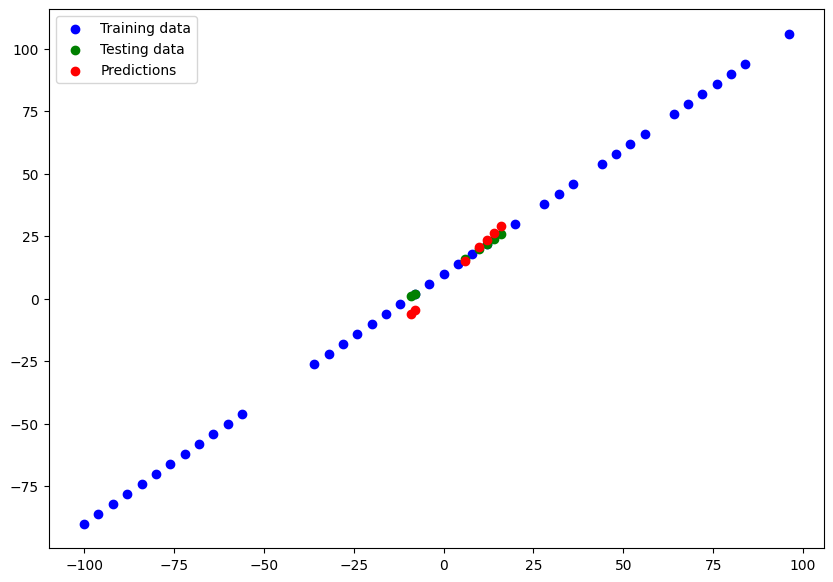

In [ ]:
plot_pred(X_train,
          y_train,
          X_valid,
          y_valid,
          y_pred_3)

In [ ]:
mae_3 = mae(y_valid, y_pred_3),
mse_3 = mse(y_valid, y_pred_3)

🔑 **Note:** You want to start with (small experiments) and make sure they work and then increase their scale when necessary.

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
all_results = pd.DataFrame(model_results,
                           columns=["model", "mae", "mse"],
                           )   
all_results              

,model,mae,mse
0,model_1,"(9.639672,)",95.051987
1,model_2,"(9.131719,)",84.155807
2,model_3,"(3.210459,)",16.175190


In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment". 

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As your build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see the one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoards).

##Saving our models

There are two mains formats we can save our models:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model format
model_3.save("best_model_SavedModel_format")
# If you are staying within a tensorflow environnement 

In [ ]:
# HDF5 format
save_model(model_3, "best_model_HDF5_format")

Saving model to: drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/21042023-095141-best_model_HDF5_format.h5...


'drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/21042023-095141-best_model_HDF5_format.h5'

In [ ]:
# Loaded save format model
loaded_saved_model_format = load_model("drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/20042023-142357-best_model_HDF5_format.h5")

Loading saved model from: drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/20042023-142357-best_model_HDF5_format.h5


In [ ]:
loaded_saved_model_format.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 10)                20        
                                                                 
 dense_75 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_1 predictions with SaveModel format model predictions
model_3_preds = model_3.predict(X_valid)
loaded_saved_model_format_preds = loaded_saved_model_format.predict(X_valid)
loaded_saved_model_format_preds == model_3_preds

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 66ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
mae(y_valid, model_3_preds) == mae(y_valid, loaded_saved_model_format_preds)

array([False, False, False, False, False, False, False])

In [ ]:
# load in a model using the .h5 format

In [ ]:
loaded_saved_model_format_ = load_model("best_model_SavedModel_format")

Loading saved model from: best_model_SavedModel_format


In [ ]:
loaded_saved_model_format_.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_preds = model_3.predict(X_valid)
loaded_saved_model_format_preds_ = loaded_saved_model_format_.predict(X_valid)
loaded_saved_model_format_preds_ == model_3_preds

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or  any other file from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "downloaded". 

2. Use code (see the cell below).

3. Save it to google drive by connecting Google Drive and copying it there (see second code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/20042023-142357-best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp -r /content/best_model_SavedModel_format drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/
#  la commande "cp" ne copie que les fichiers individuels, mais pas les répertoires et leur contenu.

In [ ]:
!ls drive/MyDrive/Neural_network_regression_with_tensorflow_video/models/

20042023-121008-best_model_HDF5_format.h5
20042023-140840-best_model_HDF5_format.h5
20042023-142357-best_model_HDF5_format.h5
20042023-162449-best_model_HDF5_format.h5
20230420-100537-best_model_HDF5_format.h5
21042023-095141-best_model_HDF5_format.h5
best_model_SavedModel_format


## A larger example 

In [ ]:
# Import requiered libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurrance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one hot encode our insurance dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


 - Create X and y values (features and labels)
 - Create training and test sets
 - Build a neural network (sort of like model_3 above)

In [ ]:
# Create labels and features
X = insurance_one_hot.drop(["charges"], axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# Create train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

`model_1`

In [ ]:
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_insurance_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_1")
# 2. Compile the model
model_insurance_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
model_insurance_1.fit(X_train,
                    y_train,
                    epochs=100
                   )

Epoch 1/100
34/34 [==============================] - 2s 12ms/step - loss: 8698.2324 - mae: 8698.2324
Epoch 2/100
34/34 [==============================] - 0s 13ms/step - loss: 7886.3599 - mae: 7886.3599
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 7591.3643 - mae: 7591.3643
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7670.2305 - mae: 7670.2305
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7684.0840 - mae: 7684.0840
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7535.9751 - mae: 7535.9751
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7583.5044 - mae: 7583.5044
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7738.7012 - mae: 7738.7012
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7619.7627 - mae: 7619.7627
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.4839 - mae: 7692.48

In [ ]:
# Evaluate the model
eval_1 = model_insurance_1.evaluate(X_test, y_test)
y_preds_insurance_1 = model_insurance_1.predict(X_test)
# mae(y_test, y_preds_insurance), mse(y_test, y_preds_insurance)

9/9 [==============================] - 0s 2ms/step


Right now it looks our model is not performing to well... let's try and improve it!

`model_2`

In [ ]:
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_insurance_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_2")
# 2. Compile the model
model_insurance_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
model_insurance_2.fit(X_train,
                    y_train,
                    epochs=100
                   )

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13269.3672 - mae: 13269.3672
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12983.7373 - mae: 12983.7373
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12365.8486 - mae: 12365.8486
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11303.8760 - mae: 11303.8760
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9955.3076 - mae: 9955.3076
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8680.7490 - mae: 8680.7490
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7813.7085 - mae: 7813.7085
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7508.2988 - mae: 7508.2988
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7443.8320 - mae: 7443.8320
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7418.8677 - mae: 7

In [ ]:
eval_2 = model_insurance_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5249.2070 - mae: 5249.2070


`model_3`

In [ ]:
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_insurance_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_3")
# 2. Compile the model
model_insurance_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
model_insurance_3.fit(X_train,
                    y_train,
                    epochs=500
                   )

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13270.1299 - mae: 13270.1299
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12973.8818 - mae: 12973.8818
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12311.2207 - mae: 12311.2207
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 11202.6836 - mae: 11202.6836
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 9850.7939 - mae: 9850.7939
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8601.1133 - mae: 8601.1133
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7781.0913 - mae: 7781.0913
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7502.5244 - mae: 7502.5244
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7440.6953 - mae: 7440.6953
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7415.6768 - mae: 7

In [ ]:
eval_3 = model_insurance_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3173.8040 - mae: 3173.8040


`model_4`

In [ ]:
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_insurance_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_4")
# 2. Compile the model
model_insurance_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
model_insurance_4.fit(X_train,
                    y_train,
                    epochs=200
                   )

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12996.7705 - mae: 12996.7705
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 10227.3799 - mae: 10227.3799
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7473.3760 - mae: 7473.3760
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7375.1968 - mae: 7375.1968
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7306.1807 - mae: 7306.1807
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7228.7334 - mae: 7228.7334
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7137.3750 - mae: 7137.3750
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7036.4409 - mae: 7036.4409
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6931.8804 - mae: 6931.8804
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6816.4448 - mae: 6816.

In [ ]:
eval_4 = model_insurance_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3178.3213 - mae: 3178.3213


`model_5`

In [ ]:
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

early_stopping = create_early_stopping("mae", 3)
# 1. Create a model (same as above)
model_insurance_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(1)
], name="model_insurance_5")
# 2. Compile the model
model_insurance_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
history = model_insurance_5.fit(X_train,
                    y_train,
                    epochs=200,
                    callbacks=[early_stopping]
                   )

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 9802.8760 - mae: 9802.8760
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7356.9834 - mae: 7356.9834
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 6931.3652 - mae: 6931.3652
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6515.0620 - mae: 6515.0620
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6313.5693 - mae: 6313.5693
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6019.1118 - mae: 6019.1118
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5571.7808 - mae: 5571.7808
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4797.7393 - mae: 4797.7393
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3960.7510 - mae: 3960.7510
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3797.5989 - mae: 3797.5989

In [ ]:
eval_5 = model_insurance_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3416.3271 - mae: 3416.3271


In [ ]:
model_insurance_results = [["model_insurance_1", "{:.2f}".format(eval_1[0])],
                           ["model_insurance_2", "{:.2f}".format(eval_2[0])],
                           ["model_insurance_3", "{:.2f}".format(eval_3[0])],
                           ["model_insurance_4", "{:.2f}".format(eval_4[0])],
                           ["model_insurance_5", "{:.2f}".format(eval_5[0])]]
all_results_insurance = pd.DataFrame(model_insurance_results,
                           columns=["model", "mae_test_insurance"],
                           )   
all_results_insurance

,model,mae_test_insurance
0,model_insurance_1,6754.80
1,model_insurance_2,5249.21
2,model_insurance_3,3173.80
3,model_insurance_4,3178.32
4,model_insurance_5,3416.33


Text(0.5, 0, 'epochs')

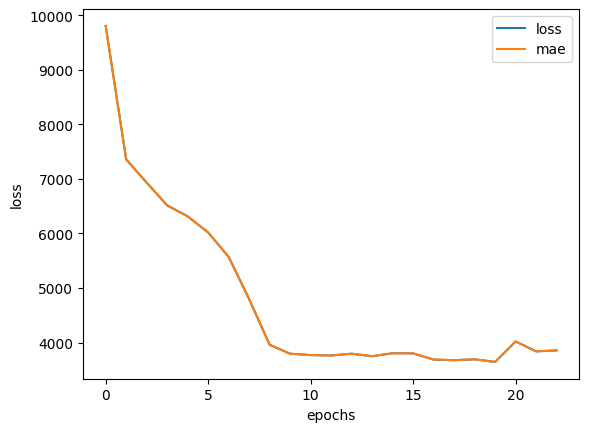

In [ ]:
# Plot history (also known as a loss curve or training curve) 
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Questions:** How long should you train for ?

It depends on the problem you are working for.
So TenFlow has a solution! It is called the [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training at a certain metric. 


## Preprocessing data (normalization and standardization)

In terms of scalling values, neural networks tend to prefer normalization.

If you re not sure on which to use, you could try both and see which performs better. See [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02). 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn 

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit the column transformer to our training data 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data looks like now ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train[X_train["age"] == 18]

,age,sex,bmi,children,smoker,region
1033,18,male,21.565,0,yes,northeast
1334,18,female,31.920,0,no,northeast
354,18,female,38.280,0,no,southeast
1283,18,male,30.030,1,no,southeast
471,18,female,30.115,0,no,northeast
...,...,...,...,...,...,...
564,18,female,32.120,2,no,southeast
600,18,female,39.160,0,no,southeast
1215,18,male,39.140,0,no,northeast
121,18,male,23.750,0,no,northeast


In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on and see how it goes.

In [ ]:
# build a neural network model to fit our data
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

early_stopping = create_early_stopping("mae", 3)
# 1. Create a model (same as above)
model_insurance_normal_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_normal_1")
# 2. Compile the model
model_insurance_normal_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
history = model_insurance_normal_1.fit(X_train_normal,
                    y_train,
                    epochs=500,
                    callbacks=[early_stopping]
                   )

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13341.1191 - mae: 13341.1191
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13320.4502 - mae: 13320.4502
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13274.0498 - mae: 13274.0498
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13196.5088 - mae: 13196.5088
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 13086.6914 - mae: 13086.6914
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 12944.3848 - mae: 12944.3848
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12770.0293 - mae: 12770.0293
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 12563.8281 - mae: 12563.8281
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 12325.9043 - mae: 12325.9043
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 12058.22

In [ ]:
eval_normal_1 = model_insurance_normal_1.evaluate(X_test_normal, y_test)
# Better result with 386 epochs against 500

9/9 [==============================] - 0s 2ms/step - loss: 3162.8899 - mae: 3162.8899


In [ ]:
eval_3

[3173.803955078125, 3173.803955078125]

🛠 01. Neural network regression with TensorFlow Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [ ]:
# build a neural network model to fit our data
# Build a model
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

early_stopping = create_early_stopping("mae", 3)
# 1. Create a model (same as above)
model_insurance_normal_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
], name="model_insurance_normal_2")
# 2. Compile the model
model_insurance_normal_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# Let's fit our model to the training data 
# 3. Fit the model
history = model_insurance_normal_2.fit(X_train_normal,
                    y_train,
                    epochs=500,
                    callbacks=[early_stopping]
                   )

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13336.4932 - mae: 13336.4932
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13174.2617 - mae: 13174.2617
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12322.7812 - mae: 12322.7812
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 10267.5088 - mae: 10267.5088
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 8372.1543 - mae: 8372.1543
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 7848.1562 - mae: 7848.1562
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7657.3267 - mae: 7657.3267
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7457.8779 - mae: 7457.8779
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7245.1348 - mae: 7245.1348
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 6999.1777 - mae: 6

In [ ]:
eval_normal_2 = model_insurance_normal_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.9043 - mae: 3160.9043


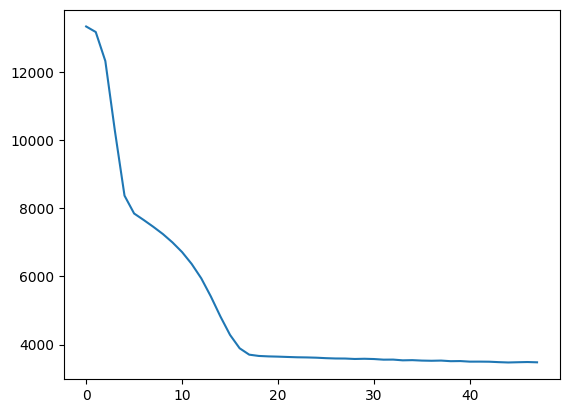

In [ ]:
plt.plot(history.history["loss"])